# **Data Analyst Job Posting Projects**
**Sebastian Ortuno Barrero**

This project looks at job ads for Data Analyst jobs using Python. The goal is to learn about the job market, such as popular job titles, where most jobs are, what skills are needed, and how much money the jobs pay.

The dataset has 2,253 job and 15 columns.

We cleaned the data by working with each columns' needs.

The project shows:

- How many job openings are by job title.
- How salaries change and if they connect to company ratings.
- Which cities and states have the most Data Analyst jobs.
- What kinds of companies and industries offer these jobs.
- The most wanted skills like SQL, Excel, Python, R, Tableau and Excel.



### **1 Import the packages and read the csv file**  

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore') 

In [135]:
###  Read the data

In [136]:
df=pd.read_csv(r"C:\Users\sebas\OneDrive\Documents\NEC MASTERS\Projects Portfolio\Projects Portfolio\Python\EDA\DataAnalyst.csv",index_col=0)

### **2. Exploring the data Information**

In [137]:
pd.set_option("Display.max_columns",None) # Display all the columns.
pd.set_option("Display.max_rows",10)      # Display only ten rows

df.sample(10)                             # Display 10 random examples.

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
337,Senior Business Intelligence & Data Science An...,$42K-$74K (Glassdoor est.),Position: Senior Business Intelligence & Data ...,2.5,CheckedUp\n2.5,"New York, NY","New York, NY (US), NY",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
655,Sr Data Analyst,$42K-$66K (Glassdoor est.),Job Description\nMyLife.com is seeking a Sr. D...,3.1,MyLife.com\n3.1,"Los Angeles, CA","Los Angeles, CA",1 to 50 employees,2002,Company - Private,Internet,Information Technology,$10 to $25 million (USD),-1,-1
1010,Data/Business Analyst,$46K-$102K (Glassdoor est.),U-Haul Corporate Headquarters\nU-Haul Internat...,3.1,Uhaul\n3.1,"Phoenix, AZ","Reno, NV",10000+ employees,1945,Company - Public,Truck Rental & Leasing,Transportation & Logistics,$10+ billion (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
2021,BI Developer - Data Analyst,$65K-$120K (Glassdoor est.),Title Data ScientistClinical Contracts Associa...,4.1,"LeadStack, Inc.\n4.1","Foster City, CA","San Francisco, CA",51 to 200 employees,2016,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
1559,Advance Data Analyst HSV Materials Customer Su...,$51K-$93K (Glassdoor est.),Cadence has an exciting opportunity for an Adv...,4.1,Cadence Design Systems\n4.1,"San Jose, CA","San Jose, CA",5001 to 10000 employees,1988,Company - Public,Computer Hardware & Software,Information Technology,$1 to $2 billion (USD),"Mentor Graphics, Synopsys",-1
1869,Data Stewardship Senior Analyst,$53K-$99K (Glassdoor est.),"Our Client, FORTUNE® 50 home improvement compa...",-1.0,Data Bridge Consultants,"Charlotte, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1
1204,Data Analyst,$37K-$68K (Glassdoor est.),"Under the direction of the Data Analyst, the Q...",3.1,Integrated Resources\n3.1,"San Antonio, TX","Edison, NJ",201 to 500 employees,1996,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1
476,HQ Data Analyst,$43K-$69K (Glassdoor est.),ITA International (ITA) is a provider of integ...,3.0,ITA International\n3.0,"Newport News, VA","Yorktown, VA",201 to 500 employees,-1,Company - Public,Accounting,Accounting & Legal,$10 to $25 million (USD),-1,-1
645,"Digital Media Data Analyst, Apple TV+",$42K-$66K (Glassdoor est.),"Posted: Jun 24, 2020\nWeekly Hours: 40\nRole N...",4.1,Apple\n4.1,"Culver City, CA","Cupertino, CA",10000+ employees,1976,Company - Public,Computer Hardware & Software,Information Technology,$10+ billion (USD),"Google, Microsoft, Samsung Electronics",-1


Looking at the data we have a lot of work to do. We will clean the data step by step starting in the next point.



In [138]:
df.info() # Summary of a DataFrame's structure

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


 Above we can observe there are 15 columns. Float64(1), int64(1), object(13).

In [139]:
df.shape #Dimensions of the data.

(2253, 15)

Our table has 2253 rows and 15 columns.

## **3. Preparing the data for the EDA**

#### **3.1 Looking for the missing values.**

In [140]:
df.isnull().sum()

Job Title          0
Salary Estimate    0
Job Description    0
Rating             0
Company Name       1
                  ..
Industry           0
Sector             0
Revenue            0
Competitors        0
Easy Apply         0
Length: 15, dtype: int64

Even though we only see one missing value, by exploring our data, we can identify many more missing values represented by -1. What we can do is convert all of them into NULL values.

In [141]:
# Replacing -1, -1.0 and all possible variants with NaN

df.replace("-1", np.nan) 
df.replace("-1", np.nan, inplace=True)
df.replace(-1,np.nan, inplace=True)
df.replace(-1.0, np.nan, inplace=True)

In [142]:
df.isnull().sum() #Missing values.

Job Title             0
Salary Estimate       1
Job Description       0
Rating              272
Company Name          1
                   ... 
Industry            353
Sector              353
Revenue             163
Competitors        1732
Easy Apply         2173
Length: 15, dtype: int64

Now, we can see that there are more missing values than before. We will address them column by column in the next steps.

### **3.2 Duplicate values**

In [143]:
df.duplicated().sum()

0

There are not any duplicate values.

### **3.3 Data Cleaning: Splitting Location into City and State**

For this column, we need to create separate columns for state and city to improve visualizations and gain more meaningful insights. We will extract this information by splitting the values in the location column. Any value before the comma (,) corresponds to the city, and the value after the comma corresponds to the state. For example, in "Tampa, FL," Tampa is the city and FL is the state.

In [144]:
df["State"]=df["Location"].str.split(",").str[1] # Create State column.
df["City"]=df["Location"].str.split(",").str[0]  # Create City column.
df.drop("Location",axis=1,inplace=True)          #Dropping Location column.

### **3.3.1 Data-Cleaning: State Column.**

We will take a look to our missing values in the state column:

In [145]:
df["State"].isnull().sum()

0

There are not any missing value in our column.

Now, we will check for the values.

In [146]:
df["State"].value_counts()

State
CA          626
TX          394
NY          345
IL          164
PA          114
           ... 
DE           11
Arapahoe      8
GA            4
KS            3
SC            3
Name: count, Length: 20, dtype: int64

 We can see there is Araphoe value, which is not a state but it is located in CO. We need to change its values.

In [147]:
df["State"]=df["State"].str.replace("Arapahoe","CO")

### **3.3.2 Data Cleaning: City Column**

In [148]:
df["City"].value_counts()  # Display values from City column

City
New York         310
Chicago          130
San Francisco    119
Austin            81
Los Angeles       80
                ... 
Addison            1
San Fernando       1
Burr Ridge         1
Northlake          1
Littleton          1
Name: count, Length: 249, dtype: int64

In [149]:
df["City"].isnull().sum() # Looking at the missing values in City column

0

### **3.4 Data Cleaning: Job Title**

In [150]:
df["Job Title"].value_counts()[:20]

Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
                          ... 
Sr Data Analyst              9
Data Management Analyst      8
Data Warehouse Analyst       8
Data Science Analyst         7
Technical Data Analyst       7
Name: count, Length: 20, dtype: int64

- There are a few values that can be renamed.
- (Sr Data Analyst, Sr. Data Analyst, "Senior Analyst, Data Analytics", "Data Analyst - Sr" )-> Senior Data Analyst
- Data Analyst Junior, Jr. Data Analyst, Data Analyst â Junior -> Junior Data Analyst


In [151]:
# Rename all the values needed.

df["Job Title"]=df["Job Title"].str.replace("Sr. Data Analyst","Senior Data Analyst")
df["Job Title"]=df["Job Title"].str.replace("Sr Data Analyst","Senior Data Analyst")
df["Job Title"]=df["Job Title"].str.replace("Data Analyst - Sr", "Senior Data Analyst")
df["Job Title"]=df["Job Title"].str.replace("Senior Analyst, Data Analytics", "Senior Data Analyst")
df["Job Title"]=df["Job Title"].str.replace("Data Analyst Junior", "Junior Data Analyst")
df["Job Title"]=df["Job Title"].str.replace("Data Analyst â Junior","Junior Data Analyst")
df["Job Title"]=df["Job Title"].str.replace("Jr. Data Analyst","Junior Data Analyst")

In [152]:
# So far this column does not contain null values.

df["Job Title"].isnull().sum()

0

### **3.5 Data Cleaning: Salary Estimate**

Taking a look to our data, there are extra information that we do not need in our data.
Most of the rows conntains "(Glassdoor est.)", which we will delete them.

In [153]:
df["Salary Estimate"]=df["Salary Estimate"].str.split("(").str[0] # For salary estimate we need to delete "(Glassdoor est.)" from the rows.

Salary is not in a numeric form. It contains signs such as $, -, texts in form of a range between two numbers. Now, let's take a look to the null values.

In [154]:
df["Salary Estimate"].isnull().sum() # We have one missing value.

1

In [155]:
df[df["Salary Estimate"].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,City
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN,WA,Kent


As we can see all the information about our missing value, let's try to see if we can find more information about its Job Title.

In [156]:
df.loc[df["Job Title"]=="Configuration/Data Management Analyst III"]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,City
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN,WA,Kent


Since this is the only company with no similar jobs that could provide information about the missing value in our Salary Estimate column, it is better to drop the row with the missing value.

In [157]:
df.drop(2149,inplace=True)

In [158]:
df["Salary Estimate"].isnull().sum()

0

Now that we've dealt with the missing values, let's extract the salary numbers and create the following columns:

Maximum Salary Column

Minimum Salary Column

Average Salary Column

In [159]:
# Create Min_Salary column extracting data from Salary Estimate.
df["Min_Salary"]=df["Salary Estimate"].str.split("-").str[0].str.replace(r"[\$,kK]", "", regex=True).astype("int")
df["Min_Salary"]=df["Min_Salary"]*1000
# Create Max_Salary column extracting data from Salary Estimate.
df["Max_Salary"]=df["Salary Estimate"].str.split("-").str[1].str.replace(r"[\$,kK]","",  regex=True).astype("int")
df["Max_Salary"]=df["Max_Salary"]*1000
# Create Average_Salary column extracting data from Salary Estimate.
df["Average_Salary"]=((df["Min_Salary"]+df["Max_Salary"])/2)

In [160]:
# Taking a look to the salary estimate and new columns created.

df[['Salary Estimate','Min_Salary','Max_Salary','Average_Salary']].head(10) 

,Salary Estimate,Min_Salary,Max_Salary,Average_Salary
0,$37K-$66K,37000,66000,51500.0
1,$37K-$66K,37000,66000,51500.0
2,$37K-$66K,37000,66000,51500.0
3,$37K-$66K,37000,66000,51500.0
4,$37K-$66K,37000,66000,51500.0
5,$37K-$66K,37000,66000,51500.0
6,$37K-$66K,37000,66000,51500.0
7,$37K-$66K,37000,66000,51500.0
8,$37K-$66K,37000,66000,51500.0
9,$37K-$66K,37000,66000,51500.0


### **3.6. Data cleaning: Job Description**

In [161]:
df["Job Description"].isnull().sum()

0

In [162]:
# No missing values found in this column.

In [163]:
df["Job Description"][0] #Looking at the data from the first row

"Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems that im

 Seems that Job description is too long. However, we can use tons of useful information. For the EDA, we can focus on certain program languages requirements such as Python, R, SQL, Excel, Tableau, Power BI. Then, We will create new columns.

In [164]:
df["Python_Requirement"]=df["Job Description"].str.contains("Python")     # Python requirement in Job description and creating a column.
df["R_Requirement"]=df["Job Description"].str.contains(" R, ")            # R requirement in Job description and creating a column.
df["SQL_Requirement"]=df["Job Description"].str.contains("SQL")           # SQL requirement in Job description and creating a column.
df["Excel_Requirement"]=df["Job Description"].str.contains("Excel")       # Excel requirement in Job description and creating a column.
df["Tableau_Requirement"]=df["Job Description"].str.contains("Tableau")   # Tableau requirement in Job description and creating a column.
df["PowerBI_Requirement"]=df["Job Description"].str.contains("Power BI")  # Power BI requirement in Job description and creating a column.

### **3.7 Data Cleaning: Ratings**

In [165]:
df["Rating"].sample(10) #Looking at 10 sample from our data

1396    NaN
1570    3.4
1518    4.1
1973    3.0
1976    3.8
1932    NaN
1525    4.3
2057    3.6
847     3.2
632     4.0
Name: Rating, dtype: float64

In [166]:
df["Rating"].isnull().sum()

272

We have 272 missing values. For now, we keep them.

## **3.8 Data Cleaning: Company Name**

If we analyze the company column, we can see that there are \n%% at the end, which are not needed for our purposes. 

In [167]:
df["Company Name"]=df["Company Name"].str.split("\n").str[0] 

In [168]:
df["Company Name"].isnull().sum()

1

In [169]:
df.loc[df["Company Name"].isnull()] # Looking at the row from our null value.

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,City,Min_Salary,Max_Salary,Average_Salary,Python_Requirement,R_Requirement,SQL_Requirement,Excel_Requirement,Tableau_Requirement,PowerBI_Requirement
1860,Data Analyst,$53K-$99K,"Kindred at Home, part of the Kindred at Home f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,Mooresville,53000,99000,76000.0,False,False,True,False,False,False


In [170]:
# We can keep this row for job title, salary and job description.

### **3.9 Data Cleaning: Sector**

In [171]:
df["Sector"].value_counts()

Sector
Information Technology               570
Business Services                    523
Finance                              169
Health Care                          151
Education                             52
                                    ... 
Telecommunications                    11
Restaurants, Bars & Food Services      8
Arts, Entertainment & Recreation       7
Mining & Metals                        1
Travel & Tourism                       1
Name: count, Length: 24, dtype: int64

In [172]:
# Column names looks good.

In [173]:
# Let's take a look to the missing values
df["Sector"].isnull().sum()

353

I will keep the rows because the information in the other columns is important.

### **4. Data Organization: Selecting and Refining Key Features**

Our table is finally clean and ready for analysis. We can now reorganize the DataFrame and filter it to include only the most useful columns.

In [174]:
#Organizing our dataset.

df=df[["Job Title", "Salary Estimate", "Min_Salary", "Max_Salary","Average_Salary","Job Description", "Rating", "Company Name", "Industry", "Sector", "City", "State", "Type of ownership", "Python_Requirement", "R_Requirement", "SQL_Requirement", "Excel_Requirement", "Tableau_Requirement", "PowerBI_Requirement"]]

In [175]:
df.head(20) #Looking to our clean dataset.

,Job Title,Salary Estimate,Min_Salary,Max_Salary,Average_Salary,Job Description,Rating,Company Name,Industry,Sector,City,State,Type of ownership,Python_Requirement,R_Requirement,SQL_Requirement,Excel_Requirement,Tableau_Requirement,PowerBI_Requirement
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,37000,66000,51500.0,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,Social Assistance,Non-Profit,New York,NY,Nonprofit Organization,True,True,True,False,False,False
1,Quality Data Analyst,$37K-$66K,37000,66000,51500.0,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,Health Care Services & Hospitals,Health Care,New York,NY,Nonprofit Organization,False,True,True,True,False,False
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,37000,66000,51500.0,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,Internet,Information Technology,New York,NY,Company - Private,True,False,True,False,True,False
3,Data Analyst,$37K-$66K,37000,66000,51500.0,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,IT Services,Information Technology,New York,NY,Subsidiary or Business Segment,False,False,True,False,True,False
4,Reporting Data Analyst,$37K-$66K,37000,66000,51500.0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,Sports & Recreation,"Arts, Entertainment & Recreation",New York,NY,Company - Private,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Sustainability Data Analyst,$37K-$66K,37000,66000,51500.0,Job Description\nRole Description\n\nSustainab...,3.6,CodeGreen Solutions,Building & Personnel Services,Business Services,New York,NY,Company - Private,True,True,True,True,False,False
16,Data Analyst,$37K-$66K,37000,66000,51500.0,Undertone stands alone among AdTech and ad net...,3.8,Undertone,Advertising & Marketing,Business Services,New York,NY,Subsidiary or Business Segment,False,False,True,False,True,False
17,Clinical Data Analyst,$37K-$66K,37000,66000,51500.0,About Us:\n\nNYSTEC is a non-profit technology...,3.8,NYSTEC,Consulting,Business Services,New York,NY,Nonprofit Organization,True,False,True,False,False,False
18,DATA PROGRAMMER/ANALYST,$37K-$66K,37000,66000,51500.0,Company Description\n\nEDUCATION DEVELOPMENT C...,3.9,"Education Development Center, Inc.",Research & Development,Business Services,New York,NY,Nonprofit Organization,True,False,False,True,False,False


### **5. Exploratory Data Analysis**

### **5.1 Number of job opening by job titles.**

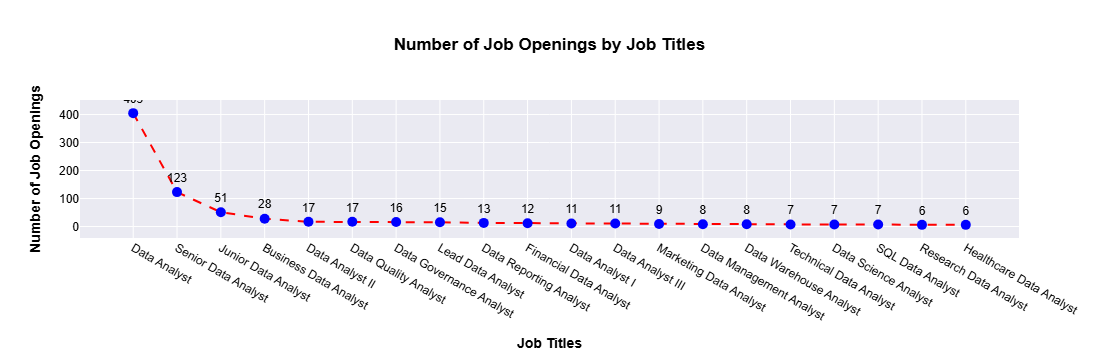

In [176]:
import plotly.graph_objects as go

# Assuming your DataFrame is `df`
fig = go.Figure()

# Top 20 most common job titles
job_title_counts = df['Job Title'].value_counts()[:20]

# Plotting the number of job openings for the top 20 job titles
fig.add_trace(go.Scatter(
    x=job_title_counts.index,  # Top 20 job titles
    y=job_title_counts.values,  # Corresponding job openings count
    name='Number of Job Openings',
    mode='markers+text+lines',  # Display markers, text, and lines
    marker_color='blue',
    marker_size=10,
    text=job_title_counts.values,  # Display job opening count as text
    textposition='top center',
    line=dict(color='red', dash='dash'),  # Line style
))

fig.update_layout(
    title="<b>Number of Job Openings by Job Titles</b>",
    xaxis_title="<b>Job Titles</b>",
    yaxis_title="<b>Number of Job Openings</b>",
    template='seaborn',
    font=dict(
        size=12,
        color="Black",
        family="Oswald, sans-serif"
    ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(
        yanchor="top",
        y=1.3,
        xanchor="left",
        x=0.78
    )
)

fig.show()


**Comments:**
- The "Data Analyst" title dominates the job market with 405 job openings.
- Out of 2,252 total job listings, most job titles specify particular skills or requirements that make each role unique.
- There is moderate demand for senior and junior roles, suggesting a career path.
- Specialized analyst roles exist but represent a small slice of the market.

 ### **5.2. Distribution of salaries according to ratings.**

We need to analyze average salary per rating and see if there is a correlation between a higher rating and higher salary.

In [177]:
df.describe()

,Min_Salary,Max_Salary,Average_Salary,Rating
count,2252.000000,2252.000000,2252.000000,1980.000000
mean,54266.873890,89979.129663,72123.001776,3.731566
std,19575.374706,29315.605358,23600.733829,0.670333
min,24000.000000,38000.000000,33500.000000,1.000000
25%,41000.000000,70000.000000,58000.000000,3.300000
50%,50000.000000,87000.000000,69000.000000,3.700000
75%,64000.000000,104000.000000,80500.000000,4.100000
max,113000.000000,190000.000000,150000.000000,5.000000


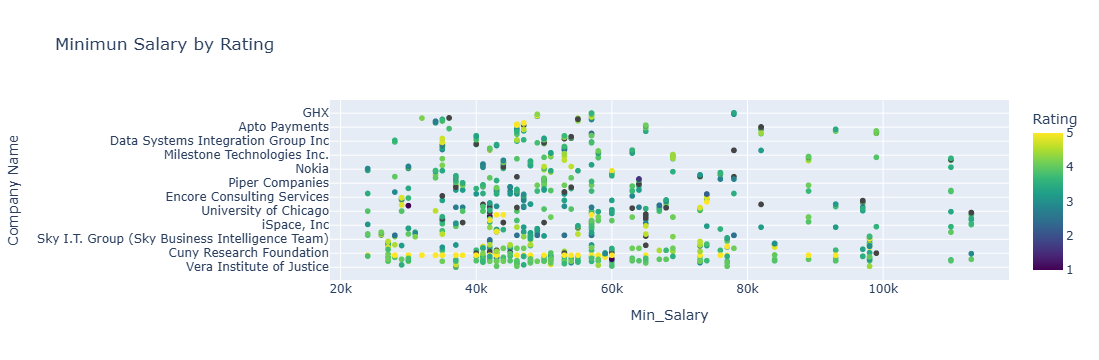

In [178]:
fig= px.scatter(df, x="Min_Salary", y="Company Name", color="Rating", color_continuous_scale="Viridis", title= " Minimun Salary by Rating")
fig.show()

In [179]:
fig=px.scatter(df, x="Max_Salary", y="Company Name", color="Rating", color_continuous_scale="Viridis", title="Max Salary by Company Name")
fig.show()

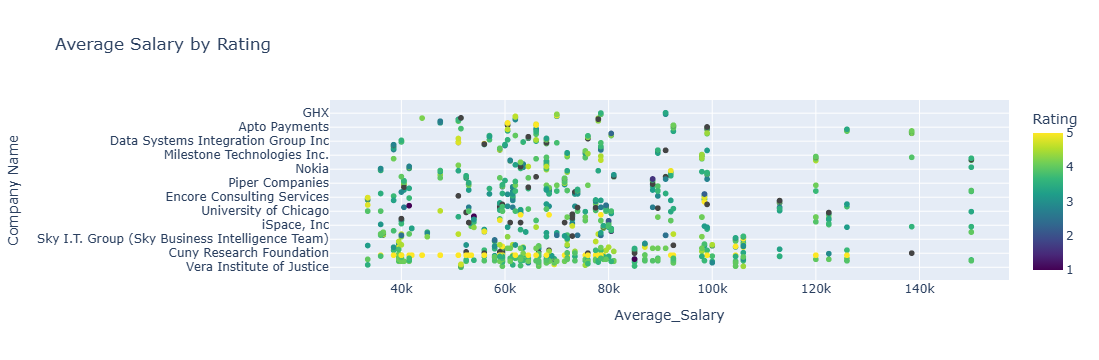

In [180]:
fig=px.scatter(df,x="Average_Salary",y="Company Name", color="Rating",color_continuous_scale="Viridis", title="Average Salary by Rating")
fig.show()

**Comments**
- Higher-rated companies (closer to yellow) are scattered across all salary levels, showing no strict correlation between rating and salaries.
- Higher ratings do not guarantee higher salaries, and vice versa.
- Most of the minimun salary are between 40k-60k.
- Most of the maximun salary are between 65k-105k.
- The average salary for data analyst positions are between 50k-80k.

### **5.3. Count Plots for Top 10 Categorical Variables**

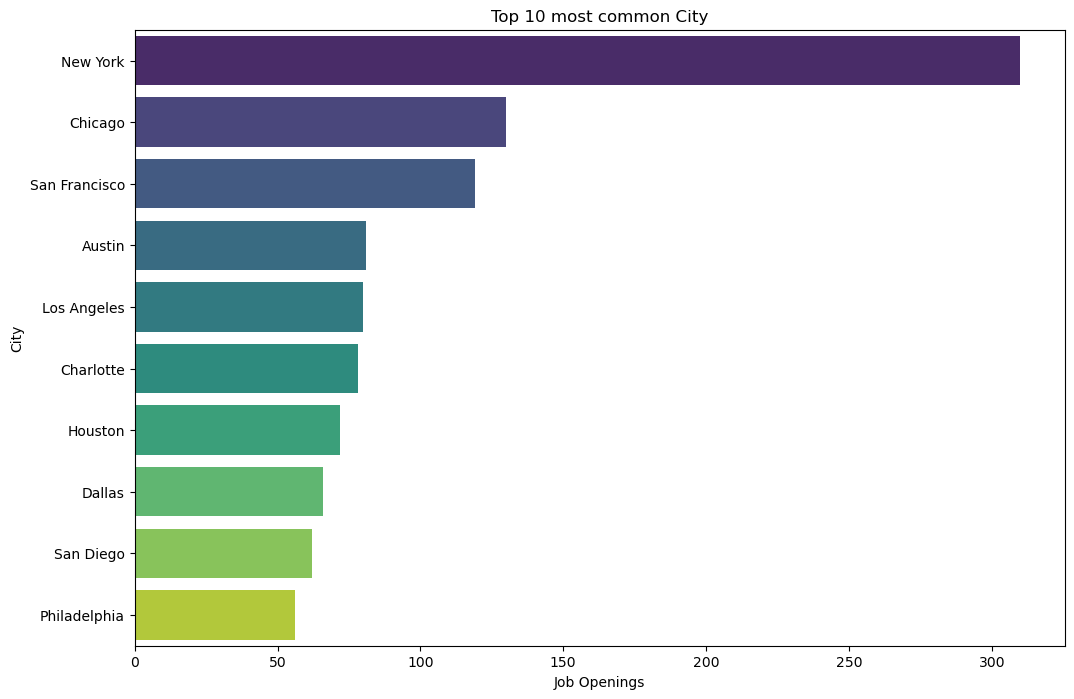

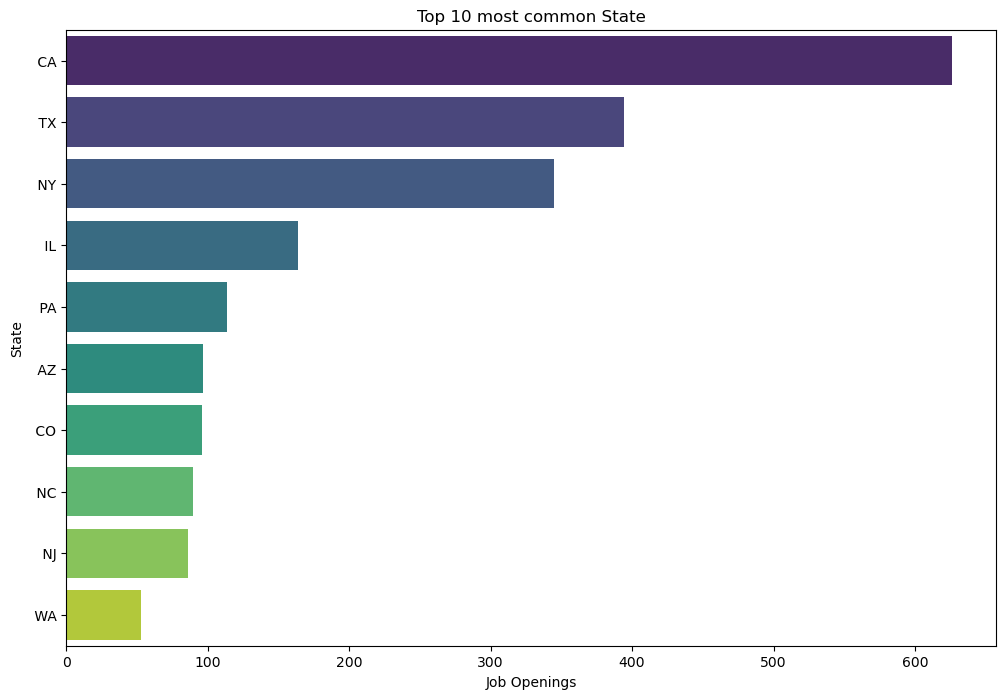

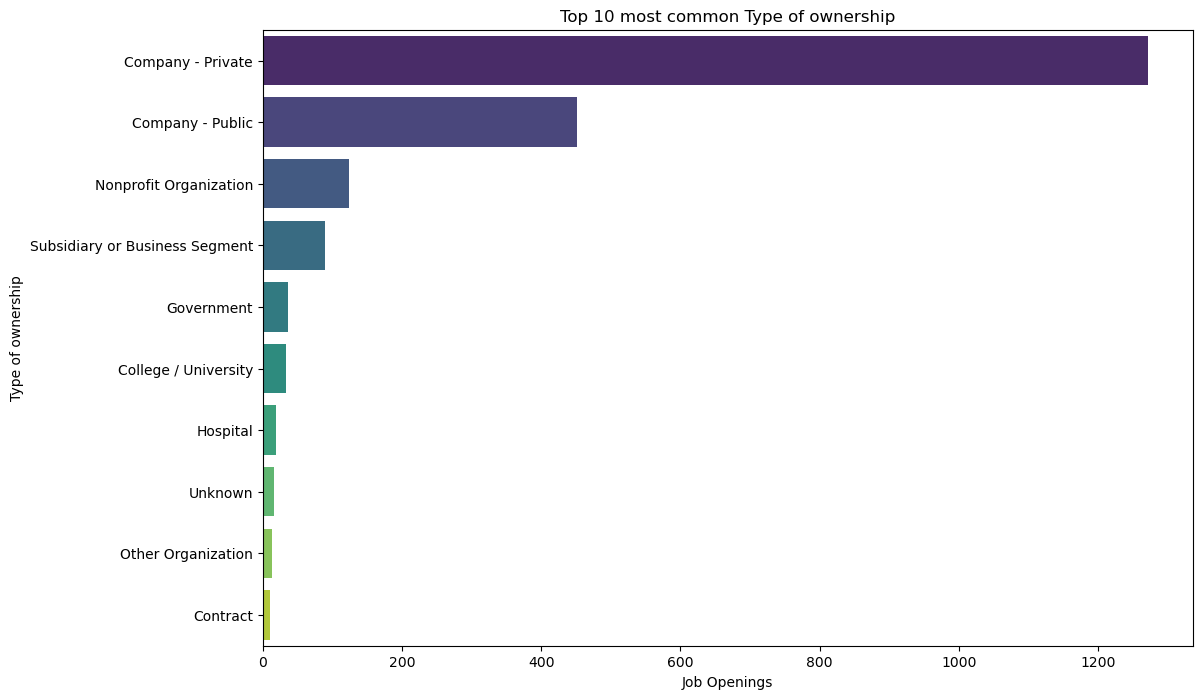

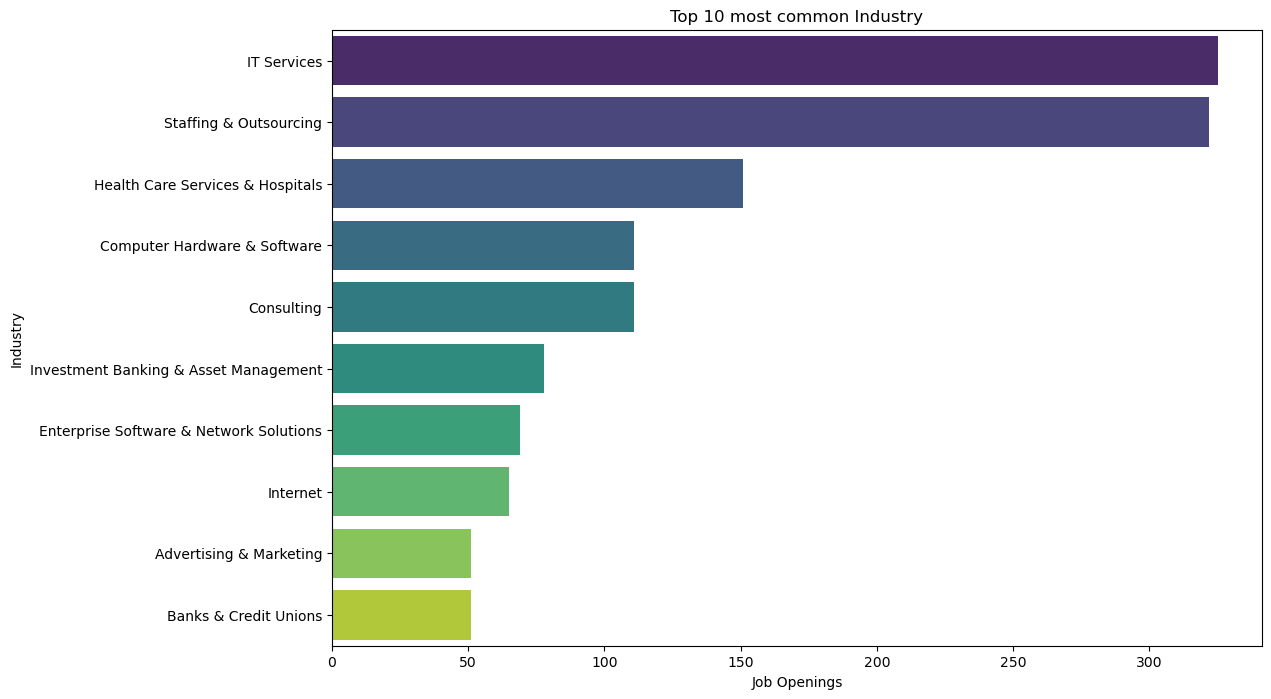

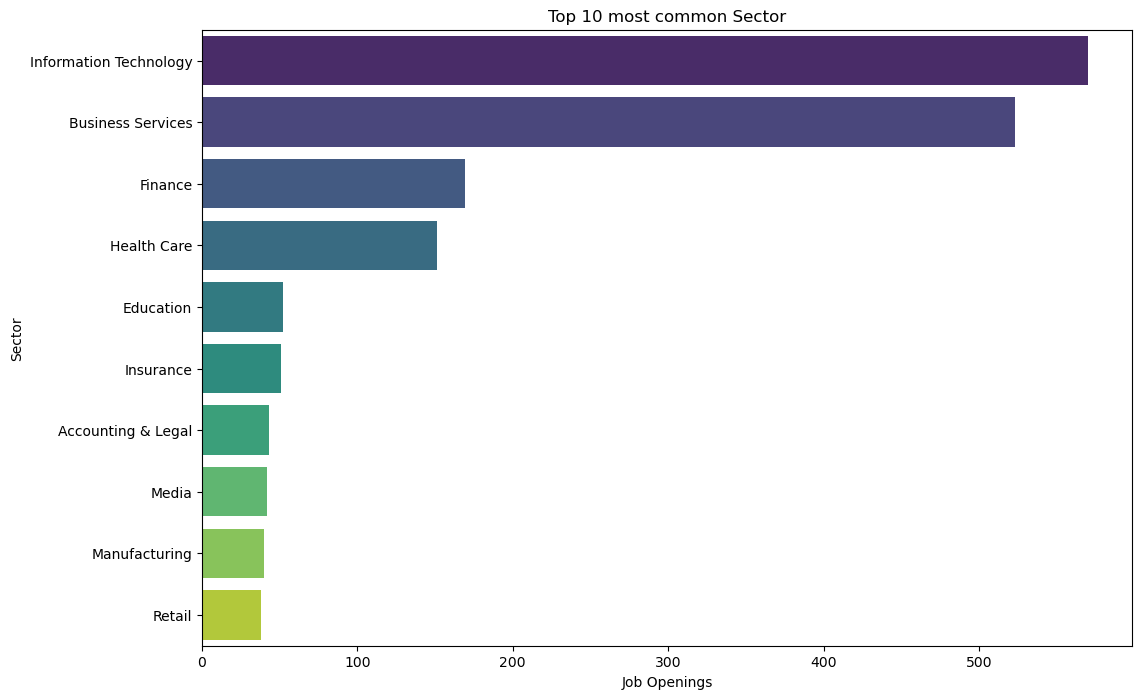

In [181]:
def plot_top_n_categories(df, column, n=20):
    top_n = df[column].value_counts().nlargest(n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Job Openings')
    plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
    plt.show()

categorical_columns = [ 'City', 'State', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df, col, n=10)

**Coments**
- Data Analyst roles are most common in large cities like New York, Chicago, and San Francisco.
- The top hiring states are California, Texas, and New York.
- Most jobs are offered by private companies, especially in the IT Services and Staffing & Outsourcing industries.
- The leading sector for data analyst roles are Information Technology, business services, and finance.


### **5.4 Most skills needed in job listing.**

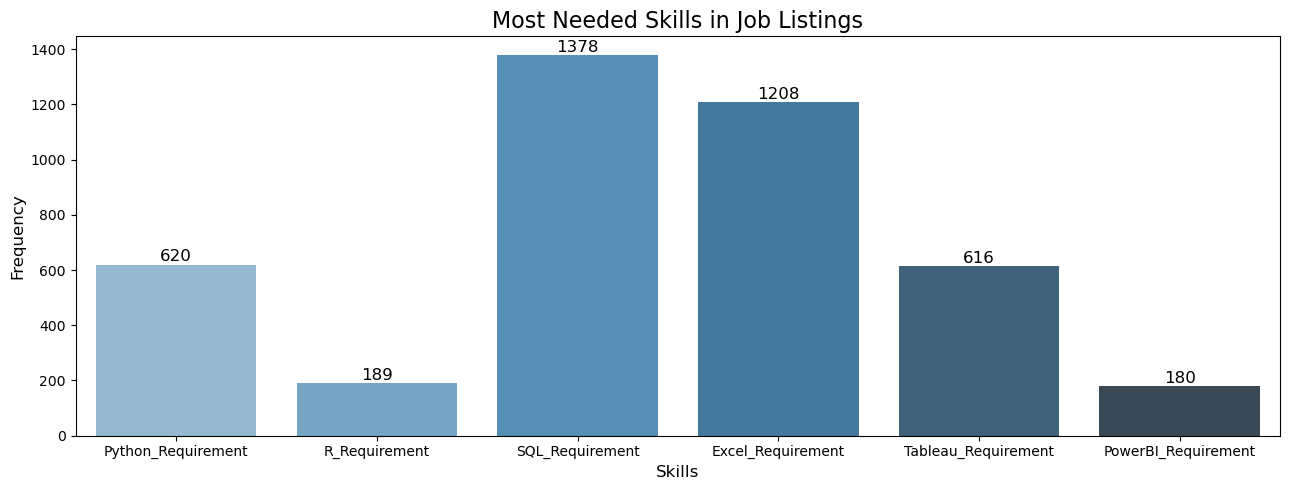

In [187]:

skills = ['Python_Requirement', 'R_Requirement', 'SQL_Requirement', 'Excel_Requirement', 'Tableau_Requirement', 'PowerBI_Requirement']
skills_count = df[skills].sum()

# Crear gráfico de barras
plt.figure(figsize=(13, 5))
sns.barplot(x=skills_count.index, y=skills_count.values, palette='Blues_d')

# Título y etiquetas
plt.title('Most Needed Skills in Job Listings', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Mostrar los valores encima de las barras
for i, value in enumerate(skills_count.values):
    plt.text(i, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=12, color='black')

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [185]:
df4 = df[['Job Title','Python_Requirement', 'SQL_Requirement','Excel_Requirement','Tableau_Requirement',"R_Requirement"]].copy()

Lang = df4.groupby('Job Title')[['Python_Requirement', 'SQL_Requirement','Excel_Requirement','Tableau_Requirement',"R_Requirement"]].sum().sort_values(by='Python_Requirement',ascending=False).head(10)
df_lang = pd.DataFrame(Lang)
df_lang = df_lang.reset_index()

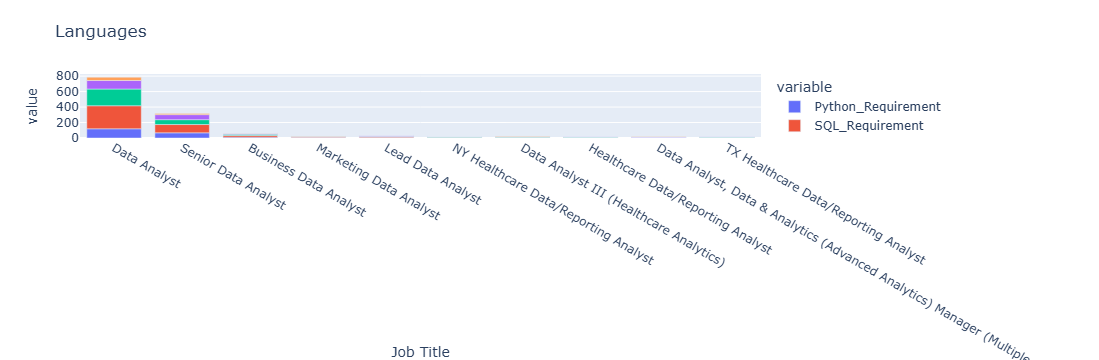

In [186]:

fig = px.bar(df_lang, x='Job Title', y=['Python_Requirement', 'SQL_Requirement','Excel_Requirement','Tableau_Requirement', "R_Requirement"], title="Languages")
fig.show()



**Comments**
- SQL and Excel are clearly the most demanded skills for data analyst positions.
- Over 50% of job listings require proficiency in SQL or Excel.
- Python is also an important skill, though it’s not as commonly required as SQL and Excel.
- Among visualization tools, Tableau is more frequently requested than Power BI.
- A combination of skills like SQL, Excel, Python, R, Tableau, and Power BI helps candidates stand out for data analyst roles.
- Focusing on these popular skills can greatly improve your chances of getting hired.

### **6. Final Conclusion**

- Data Analyst jobs are most common in big cities like New York, Chicago, and San Francisco. The states with the most job offers are California, Texas, and New York. Most of these jobs are in private companies, especially in Information Technology, Business Services, and Finance.

- The "Data Analyst" title dominates the job market with 405 job openings. Out of 2,252 total job listings, most job titles specify particular skills or requirements that make each role unique.

- Even though many jobs have the same title, each one may ask for different skills. The most needed skills are SQL and Excel, followed by Python and Tableau. Tableau is more requested than Power BI for data visualization. 

- Most average salaries are between 50k  and  80k. A high company rating does not always mean a higher salary.

- To find a good job as a Data Analyst, it is helpful to learn tools like SQL, Excel, Python, R, Tableau, and Power BI, and focus on the locations and industries with the most openings.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2252 entries, 0 to 2252
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            2252 non-null   object 
 1   Salary Estimate      2252 non-null   object 
 2   Min_Salary           2252 non-null   int32  
 3   Max_Salary           2252 non-null   int32  
 4   Average_Salary       2252 non-null   float64
 5   Job Description      2252 non-null   object 
 6   Rating               1980 non-null   float64
 7   Company Name         2251 non-null   object 
 8   Industry             1899 non-null   object 
 9   Sector               1899 non-null   object 
 10  City                 2252 non-null   object 
 11  State                2252 non-null   object 
 12  Type of ownership    2089 non-null   object 
 13  Python_Requirement   2252 non-null   bool   
 14  R_Requirement        2252 non-null   bool   
 15  SQL_Requirement      2252 non-null   bool  